<a href="https://colab.research.google.com/github/RLassorocio/fe-ct-prepcourse-fs/blob/main/Data_Wranglilng_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HIPOTESIS - OBJETIVO 

 **HIPOTESIS DATASAT DE LA NBA**, influye el pais de nacimiento con la cantidad de jugadores, solo estadounidenses son los reclutados?
Entre edad y peso hay cierta relacion?
Cual es la edad promedio con mayor cantidad de jugadores?
El promedio cantidad de partidos jugados en la temporada
Existe relacion entre los puntos que se ganas y la edad del que los hace

**OBJETIVO:**
utilizaremos los datos que tenemos para lograr desifrar el porcentaje de jugadores con nacionalidad USA, y cuantos jugadores no son de esa nacionalidad.
La frecuencia en la que se recluta a jugadores nuevos, Podemos seleccionar los equipos con mayor numero de jugadas ganadas en la temporada, y cuales con la menor cantidad. poder comprobar si hay equipos que mantienen ciertas edades o hay edades mixtas.
**CONTEXTO EMPRESARIAL**. Con el dataset de la NBA, que contamos con jugadores y sus datos especificos, queremos investigar sobre rangos de edades, poder analizar el indice de masa corporal y si hay mucha varianza, la nacionalidad y cuales son los equipos que mas reclutan.

**PROBLEMA COMERCIAL**. Analisar los datos proporcionados y proporcionar nuevas estadisticas para la inclusion de otras nacinalidades.

**CONTEXTO ANALITICO**. Se le proporciona un archivo CSV que contiene detalles sobre cada jugador, equipo nacionalidad escuela a la que asistio, año de reclutamiento jugadas ganadas tiros acertados y temporadas de juego de cada uno de los jugadores profesionales, cuantos jugadores por nacionalidad.

los datos que quiero extraer para consolidar y llegar a las predicciones de mis preguntas.

La recomendacion sobre el desafio anterior, podrian reclutar a los jugadores sin impotar en la ronda que esten ya que el potencial incial podria verse en el primer juego y corroborar que abarquen un rango de edad mayor al momento de ser llamados. Poner mas cedes de la NBA para que puedan acceder jugadores de otras zonas y tener la posibilidad de ser parte.





# ANALISIS DEL DATASET

In [307]:
d_desc = { 'layer_name': 'nombre del jugador', 'team_abbreviation': 'Nombre abreviado del equipo en el que jugó el jugador (al final de la temporada)',
          'age':'edad del jugador','player_height': 'Altura del jugador (en centímetros)', 'player_weight': 'Peso (en kilogramos)', 
          'College':'Nombre de la universidad a la que asistió el jugador', 'Country': 'Nombre del país en el que nació el jugador', 
          'draft_year': 'El año en que el jugador fue reclutado', 'draft_round': 'La ronda de draft en la que se eligió al jugador',
          'draft_number':'El número en el que el jugador fue elegido en su ronda de draft', 'Gp': 'Partidos jugados a lo largo de la temporada', 
          'Pts': 'Promedio de puntos anotados','Reb': 'Promedio de rebotes capturados','Ast': 'Número medio de asistencias repartidas', 
          'Net_rating': 'Diferencial de puntos del equipo por cada 100 posesiones mientras el jugador está en la cancha',
          'Oreb_pct': 'Porcentaje de rebotes ofensivos disponibles que atrapó el jugador mientras estaba en el suelo' , 
          'Dreb_pct': 'Porcentaje de rebotes defensivos disponibles que atrapó el jugador mientras estaba en el suelo', 
          'Usg_pct': 'Porcentaje de jugadas de equipo utilizadas por el jugador mientras estaba en la cancha' , 
          'Ts_pct':'Medida de la eficiencia de tiro del jugador que tiene en cuenta los tiros libres', 
          'Ast_pct' : 'Porcentaje de tiros de campo de compañeros de equipo que el jugador asistió mientras estaba en la cancha',
          'Season' : 'temporada de la NBA'}


In [308]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

In [309]:
%config IPcompleter.greedy=True
import pandas as pd
import numpy as np

df1=pd.read_csv('/content/all_seasons.csv')

In [310]:
import pandas as pd

df1.head

import matplotlib.pyplot as plt
import seaborn as sns 

df1 = sns.load_dataset

In [311]:
df1

<function seaborn.utils.load_dataset(name, cache=True, data_home=None, **kws)>

In [312]:
from google.colab import drive
import os
import pandas as pd
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/data-science /all_seasons.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 20] Not a directory: '/content/gdrive/MyDrive/data-science /all_seasons.csv'
/content


In [313]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt
import seaborn as sns

In [314]:
df= pd.read_csv('/content/all_seasons.csv')
df.head()


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.000,198.120,99.790,Southeastern Oklahoma State,USA,1986,2,27,55.000,5.700,16.100,3.100,16.100,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.000,215.900,117.934,Florida,USA,1990,1,24,15.000,2.300,1.500,0.300,12.300,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.000,205.740,95.254,Detroit Mercy,USA,1979,3,58,9.000,0.800,1.000,0.400,-2.100,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.000,203.200,100.697,UCLA,USA,1995,1,9,64.000,3.700,2.300,0.600,-8.700,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.000,205.740,108.862,Villanova,USA,1985,1,10,27.000,2.400,2.400,0.200,-11.200,0.109,0.179,0.127,0.611,0.040,1996-97


In [315]:
df.shape

(12305, 22)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12305 entries, 0 to 12304
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12305 non-null  object 
 1   player_name        12297 non-null  object 
 2   team_abbreviation  12297 non-null  object 
 3   age                12297 non-null  float64
 4   player_height      12297 non-null  float64
 5   player_weight      12297 non-null  float64
 6   college            12297 non-null  object 
 7   country            12297 non-null  object 
 8   draft_year         12297 non-null  object 
 9   draft_round        12297 non-null  object 
 10  draft_number       12297 non-null  object 
 11  gp                 12297 non-null  float64
 12  pts                12297 non-null  float64
 13  reb                12297 non-null  float64
 14  ast                12297 non-null  float64
 15  net_rating         12297 non-null  float64
 16  oreb_pct           122

In [317]:
df_num = df.select_dtypes('number')
df_num['y'] = df['team_abbreviation']
df_num.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,y
0,36.000,198.120,99.790,55.000,5.700,16.100,3.100,16.100,0.186,0.323,0.100,0.479,0.113,CHI
1,28.000,215.900,117.934,15.000,2.300,1.500,0.300,12.300,0.078,0.151,0.175,0.430,0.048,LAC
2,39.000,205.740,95.254,9.000,0.800,1.000,0.400,-2.100,0.105,0.102,0.103,0.376,0.148,TOR
3,24.000,203.200,100.697,64.000,3.700,2.300,0.600,-8.700,0.060,0.149,0.167,0.399,0.077,DAL
4,34.000,205.740,108.862,27.000,2.400,2.400,0.200,-11.200,0.109,0.179,0.127,0.611,0.040,MIA


In [318]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [319]:
df_num.drop_duplicates(inplace=True)


In [320]:
len(df_num)

12298

In [321]:
df_num.age.unique()

array([36., 28., 39., 24., 34., 38., 25., 29., 27., 31., 26., 21., 23.,
       32., 30., 22., 35., 37., 33., 18., 20., 40., 43., 19., 41., 42.,
       44., nan])

In [322]:
df_num.age.value_counts()

24.000    1276
23.000    1164
25.000    1139
26.000    1013
27.000     972
28.000     868
29.000     785
22.000     769
30.000     711
31.000     620
32.000     549
21.000     499
33.000     450
34.000     353
20.000     286
35.000     250
36.000     200
37.000     135
38.000      85
19.000      73
39.000      51
40.000      29
41.000       9
42.000       4
18.000       3
43.000       3
44.000       1
Name: age, dtype: int64

In [323]:
df_numcp = df_num.copy()
df_numcp.loc[df_numcp.age!=999, 'age'] = 0
df_numcp.loc[df_numcp.age==999, 'age'] = 1
df_numcp['age'].unique()

array([0.])

In [324]:
df_numcp.age.value_counts()

0.000    12298
Name: age, dtype: int64

<Axes: xlabel='age', ylabel='count'>

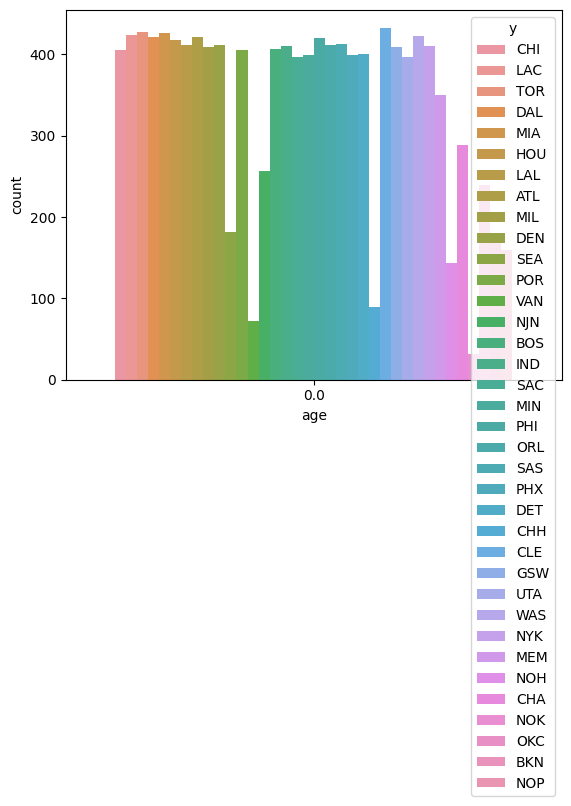

In [325]:
sns.countplot(x='age', data = df_numcp, hue = 'y')

#Grafico barras, proporcion entre edad y equipo deportivo 

In [326]:
df_numcp.y.value_counts() 

#cantidad de equipos y jugadores por equipos.

CLE    433
TOR    427
MIA    426
LAC    424
WAS    422
DAL    421
ATL    421
PHI    420
HOU    418
SAS    413
DEN    412
LAL    411
ORL    411
NYK    410
IND    410
GSW    409
MIL    409
BOS    407
CHI    405
POR    405
DET    400
MIN    399
PHX    399
UTA    397
SAC    397
MEM    350
CHA    288
NJN    257
OKC    239
SEA    182
BKN    180
NOP    159
NOH    143
CHH     89
VAN     72
NOK     32
Name: y, dtype: int64

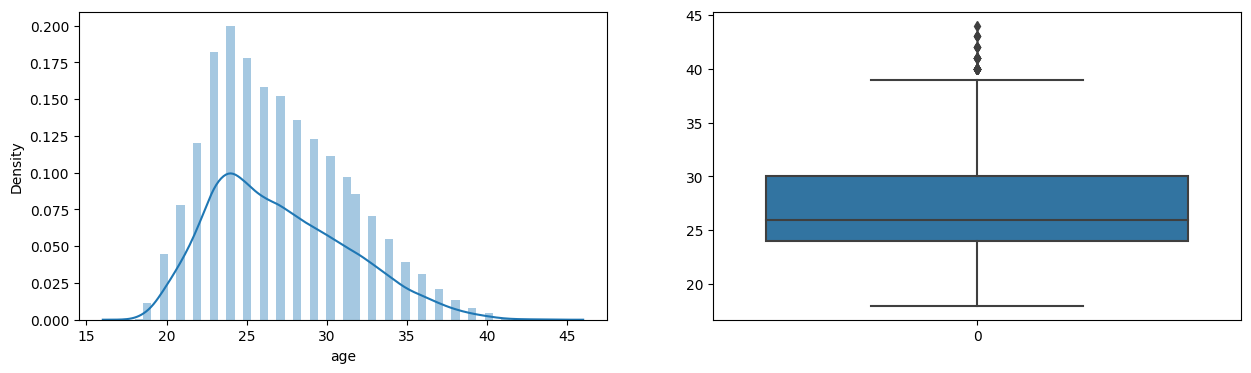

In [327]:
#variables con outliers
for col in ['age']:

    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

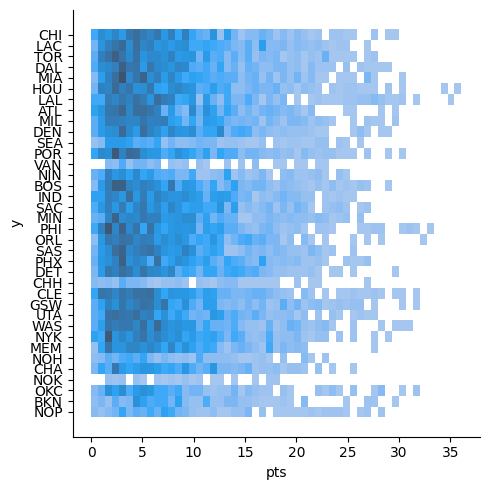

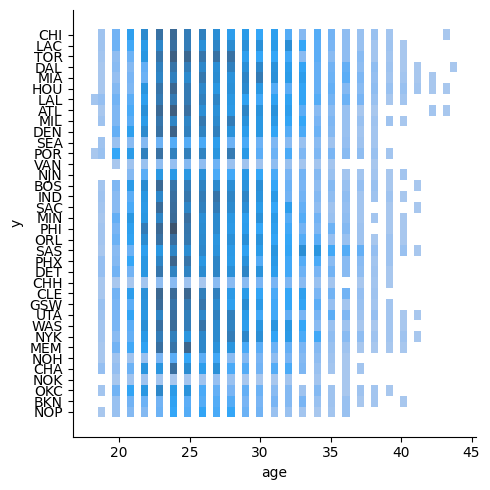

In [328]:
for col in ['pts', 'age']:

    sns.displot(x=col, y='y', data=df_num)
    plt.show()


    #equipo deportivo y puntos
    #equipo deportivo y edad

In [329]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope

39.0

In [330]:
# creamos una nueva columas con valores reemplazados:
df_num['age'] = df_num['age']
df_num.loc[df_num['age']>tope, 'age'] = tope

df_num['age'] = df_num['age']
df_num.loc[df_num['age']>=35, 'age'] = 35

#traget numerico 
df_num.y.unique()


array(['CHI', 'LAC', 'TOR', 'DAL', 'MIA', 'HOU', 'LAL', 'ATL', 'MIL',
       'DEN', 'SEA', 'POR', 'VAN', 'NJN', 'BOS', 'IND', 'SAC', 'MIN',
       'PHI', 'ORL', 'SAS', 'PHX', 'DET', 'CHH', 'CLE', 'GSW', 'UTA',
       'WAS', 'NYK', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP', nan],
      dtype=object)

In [331]:
#Inputs del modelo

df_num.head()

,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,y
0,35.000,198.120,99.790,55.000,5.700,16.100,3.100,16.100,0.186,0.323,0.100,0.479,0.113,CHI
1,28.000,215.900,117.934,15.000,2.300,1.500,0.300,12.300,0.078,0.151,0.175,0.430,0.048,LAC
2,35.000,205.740,95.254,9.000,0.800,1.000,0.400,-2.100,0.105,0.102,0.103,0.376,0.148,TOR
3,24.000,203.200,100.697,64.000,3.700,2.300,0.600,-8.700,0.060,0.149,0.167,0.399,0.077,DAL
4,34.000,205.740,108.862,27.000,2.400,2.400,0.200,-11.200,0.109,0.179,0.127,0.611,0.040,MIA


In [332]:
columnas1 = df_num.columns.tolist()[:-2]
columnas1

['age',
 'player_height',
 'player_weight',
 'gp',
 'pts',
 'reb',
 'ast',
 'net_rating',
 'oreb_pct',
 'dreb_pct',
 'usg_pct',
 'ts_pct']

In [333]:
df_num.drop_duplicates(inplace=True)

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import count


Text(0.5, 1.0, 'GRAFICO CANTIDAD DE JUGADORES POR PAIS.')

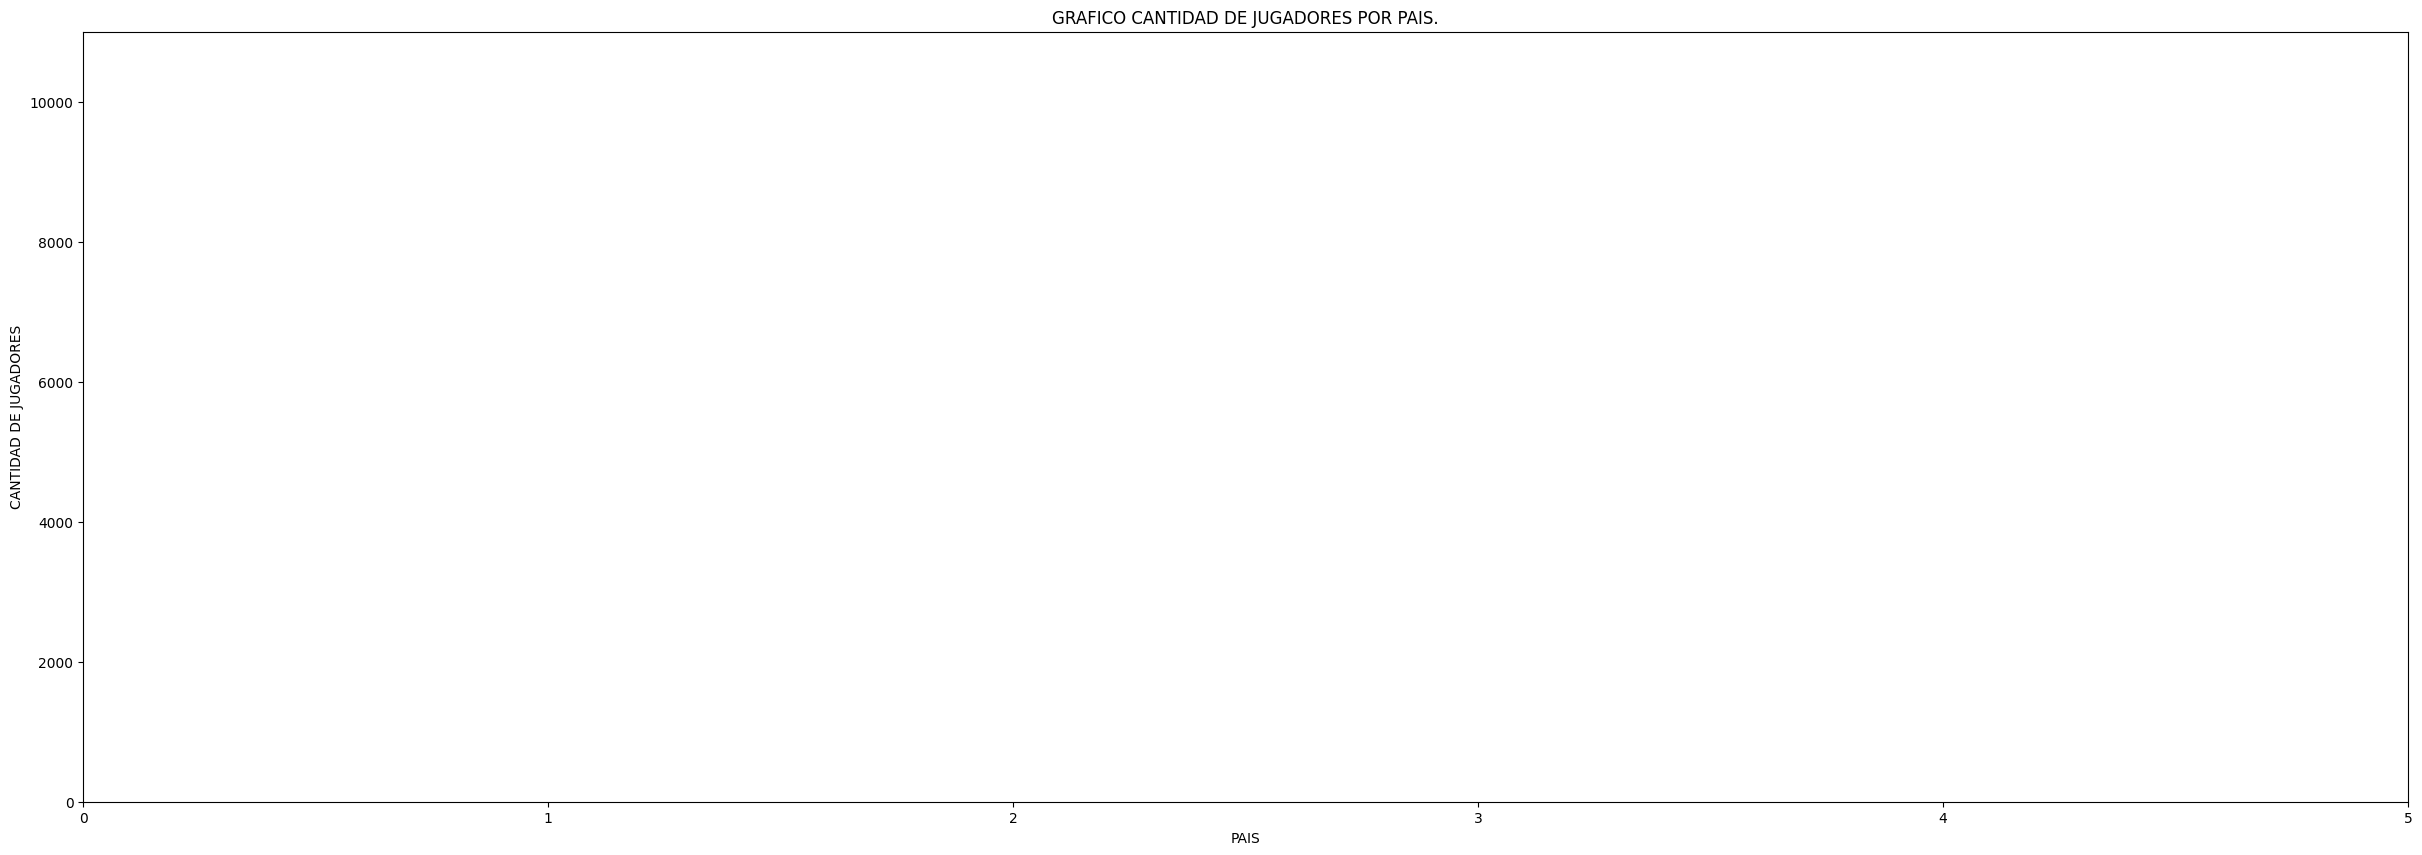

In [335]:
fig, ax = plt.subplots(figsize=(30,10))

ax.set_xlim(0, 5)
ax.set_ylim(0, 11000)
ax.set_xlabel('PAIS')
ax.set_ylabel('CANTIDAD DE JUGADORES')
ax.set_title('GRAFICO CANTIDAD DE JUGADORES POR PAIS.')


**En el grafico lineal, de arriba podemos observar que la mayor cantidad de jugadores son pertenecientes de USA, en el grafico contemplamos los seis paises con mayor cantidad de jugadores.**

age edad del jugador


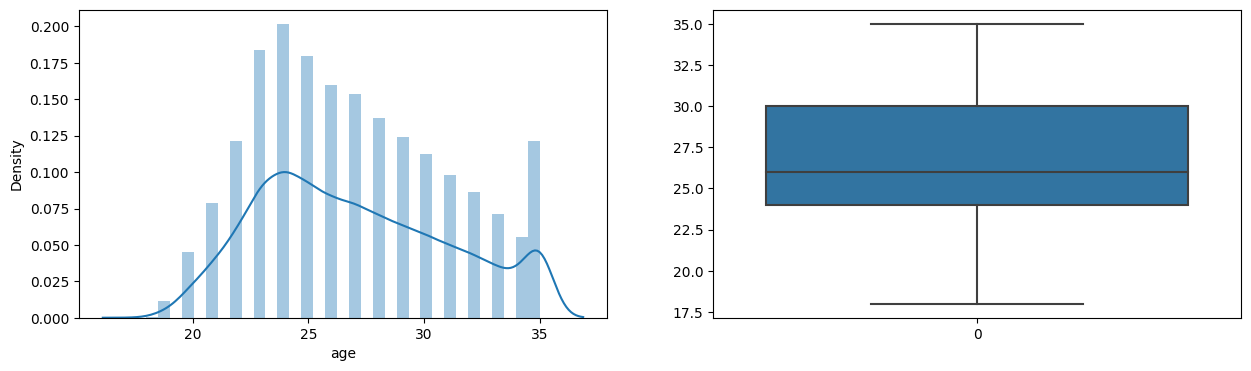

player_height Altura del jugador (en centímetros)


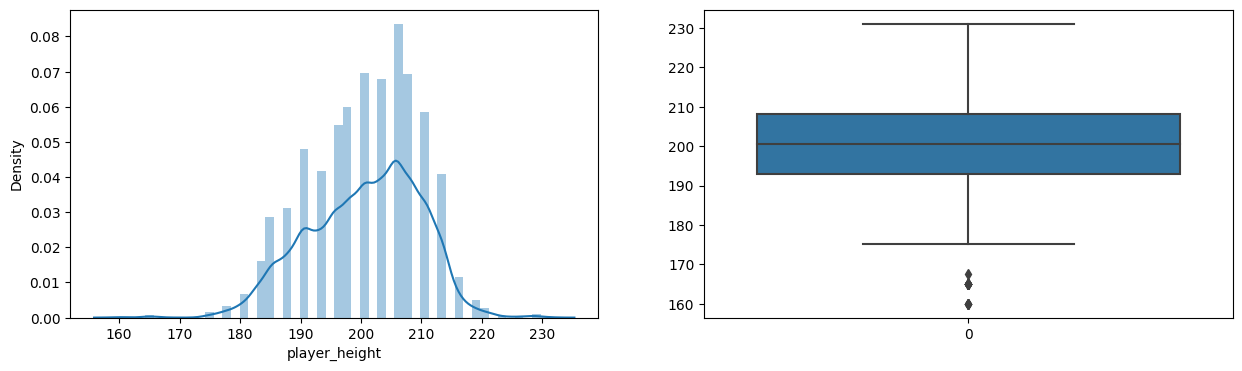

player_weight Peso (en kilogramos)


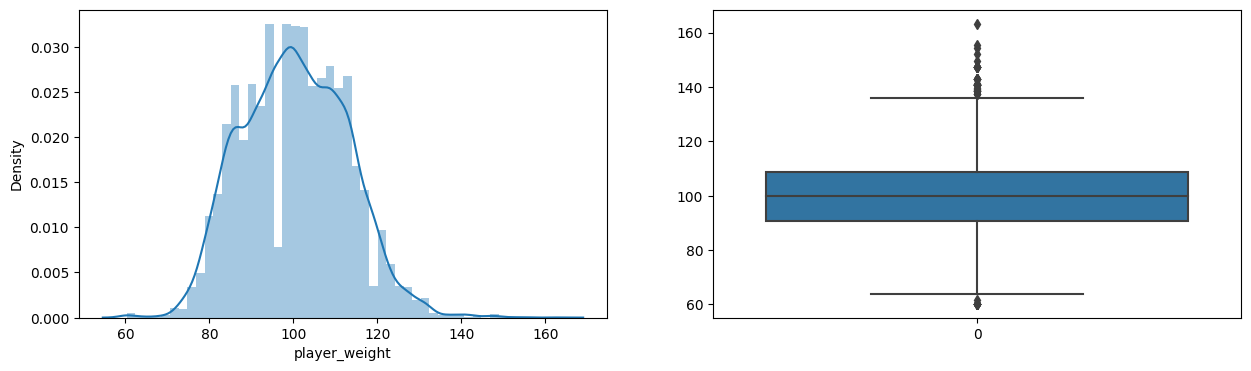

In [336]:
for col in ['age', 'player_height', 'player_weight']:
    print(col, d_desc[col])
    fig, ax = plt.subplots(1,2, figsize=(15, 4))
    ax[0] = sns.distplot(df_num[col], ax=ax[0])
    ax[1] = sns.boxplot(df_num[col], ax=ax[1])
    plt.show()

age edad del jugador


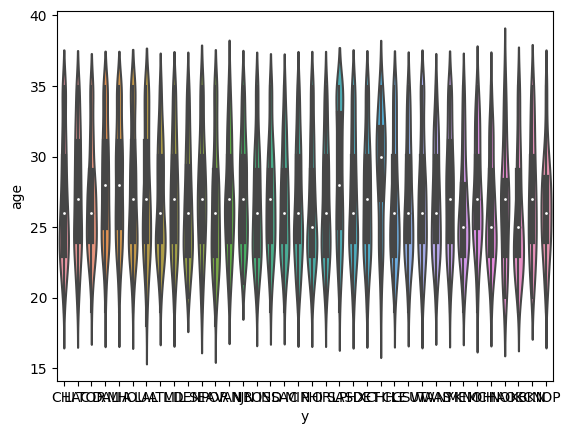

player_height Altura del jugador (en centímetros)


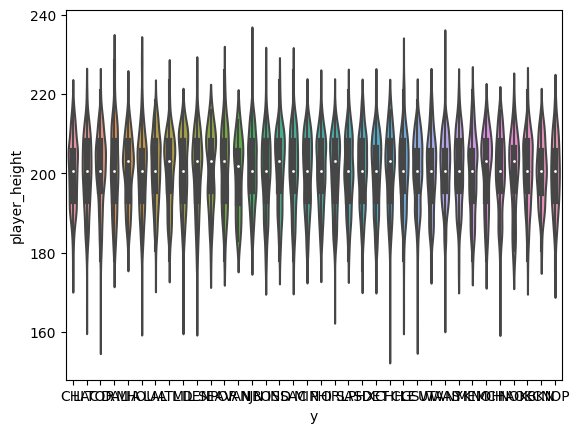

player_weight Peso (en kilogramos)


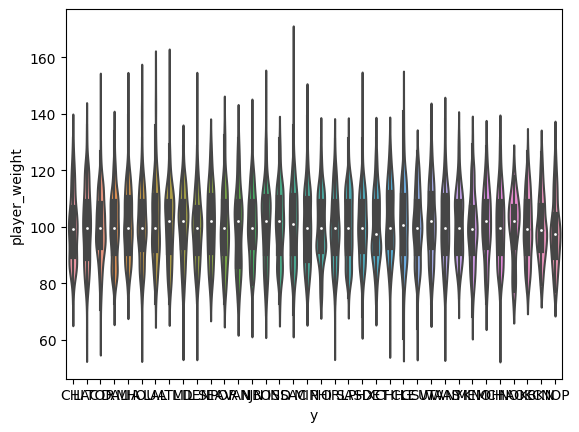

In [337]:
for col in ['age', 'player_height', 'player_weight']:
    print(col, d_desc[col])
    sns.violinplot(x='y', y=col, data=df_num)
    plt.show()

In [338]:
Q1 = df['player_height'].quantile(0.25)
Q3 = df['player_height'].quantile(0.75)

IQR = Q3-Q1

tope = Q3+1.5*IQR
tope


231.14000000000001

In [339]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
print(tf.__version__)

2.12.0


#DATA WRANGLING ENTREGA. 


In [230]:
#VALORES DUPLICADOS

In [231]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/all_seasons.csv')

df= pd.DataFrame
df

pandas.core.frame.DataFrame

In [232]:
DF= pd.DataFrame({'col player_name'
                  'col team_abbreviation',
                  'col age', ' col player_height' , 'col player_weight'	, ' col college'	, 'col country', 'col draft_year' , 
                  'col draft_round' ,	'col draft_number' ,	'col gp' ,	'col pts' ,	'col reb'	, 'col ast' ,'col net_rating' ,	
                  'col oreb_pct' ,	'col dreb_pct' ,	'col usg_pct' ,	'col ts_pct' ,	'col ast_pct'	 ,'col season' })
DF


DF.drop_duplicates()


,0
0,col reb
1,col age
2,col net_rating
3,col ast_pct
4,col dreb_pct
5,col pts
6,col player_weight
7,col ast
8,col draft_round
9,col usg_pct


In [233]:
from pandas.core.describe import describe_timestamp_as_categorical_1d
describe_timestamp_as_categorical_1d= pd.DataFrame({ 'col player_name'
                  'col team_abbreviation','col age', ' col player_height' , 'col player_weight'	, ' col college'	, 'col country', 'col draft_year' , 
                  'col draft_round' ,	'col draft_number' ,	'col gp' ,	'col pts' ,	'col reb'	, 'col ast' ,'col net_rating' ,	
                  'col oreb_pct' ,	'col dreb_pct' ,	'col usg_pct' ,	'col ts_pct' ,	'col ast_pct'	 ,'col season'    


})
df1

pandas.core.frame.DataFrame

In [234]:
df.drop_duplicates

<function pandas.core.frame.DataFrame.drop_duplicates(self, subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: "Literal['first', 'last', False]" = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None'>

In [235]:
#ORDEN JERARQUICO

In [236]:
arrays = [np.array(['col player_name'
                  'col team_abbreviation','col age', ' col player_height' , 'col player_weight'	, ' col college'	, 'col country', 'col draft_year' , 
                  'col draft_round' ,	'col draft_number' ,	'col gp' ,	'col pts' ,	'col reb'	, 'col ast' ,'col net_rating' ,	
                  'col oreb_pct' ,	'col dreb_pct' ,	'col usg_pct' ,	'col ts_pct' ,	'col ast_pct'	 ,'col season'   ]),
          np.array([1,2,3, 1,2,3, 1,2,3]),]


In [237]:
df.index

In [238]:
arrays = [np.array(["a", "a", "a", "b", "b", "b", "c", "c","c"]),
          np.array([1,2,3, 1,2,3, 1,2,3]),]
s = pd.Series(np.random.randn(9), index=arrays)
print(s)

a  1   -0.698
   2    0.696
   3   -1.059
b  1   -0.675
   2   -0.496
   3   -0.717
c  1    0.596
   2   -0.180
   3   -0.772
dtype: float64


In [239]:
s.index

MultiIndex([('a', 1),
            ('a', 2),
            ('a', 3),
            ('b', 1),
            ('b', 2),
            ('b', 3),
            ('c', 1),
            ('c', 2),
            ('c', 3)],
           )

In [240]:
s['a']

1   -0.698
2    0.696
3   -1.059
dtype: float64

In [241]:
s['b']

1   -0.675
2   -0.496
3   -0.717
dtype: float64

In [242]:
s['c']

1    0.596
2   -0.180
3   -0.772
dtype: float64

In [243]:
s.unstack()

,1,2,3
a,-0.698,0.696,-1.059
b,-0.675,-0.496,-0.717
c,0.596,-0.180,-0.772


In [244]:
s.sum(level=1)

1   -0.777
2    0.020
3   -2.548
dtype: float64

In [245]:
s.sum(level=0)

a   -1.061
b   -1.888
c   -0.356
dtype: float64

In [246]:
s.mean(level=0)

a   -0.354
b   -0.629
c   -0.119
dtype: float64

In [247]:
#GROUP BY

In [248]:
df = pd.DataFrame({'data1' : np.random.randn(5), 
                   'data2' : np.random.randn(5),
                   'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one']})
df

,data1,data2,key1,key2
0,-0.931,0.424,a,one
1,-0.319,-0.541,a,two
2,0.225,0.761,b,one
3,-1.366,-0.867,b,two
4,2.870,0.203,a,one


In [249]:
grouped=df['data1'].groupby(df['key1'])
type(grouped)

pandas.core.groupby.generic.SeriesGroupBy

In [250]:
grouped.median()

key1
a   -0.319
b   -0.571
Name: data1, dtype: float64

In [251]:
df['data1'].groupby(df['key1']).sum()

key1
a    1.621
b   -1.141
Name: data1, dtype: float64

In [252]:
df['data1'].groupby([df['key1'],df['key2']]).sum()

key1  key2
a     one     1.939
      two    -0.319
b     one     0.225
      two    -1.366
Name: data1, dtype: float64

In [253]:
df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
'key2' : ['one', 'two', 'one', 'two', 'one'],
'data1' : np.random.randn(5),
'data2' : np.random.randn(5)})

In [300]:
#Datos. entrega!

In [301]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [299]:
datos=pd.read_csv('/content/all_seasons.csv')
datos

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.000,198.120,99.790,Southeastern Oklahoma State,USA,1986,2,27,55.000,5.700,16.100,3.100,16.100,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.000,215.900,117.934,Florida,USA,1990,1,24,15.000,2.300,1.500,0.300,12.300,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.000,205.740,95.254,Detroit Mercy,USA,1979,3,58,9.000,0.800,1.000,0.400,-2.100,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.000,203.200,100.697,UCLA,USA,1995,1,9,64.000,3.700,2.300,0.600,-8.700,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.000,205.740,108.862,Villanova,USA,1985,1,10,27.000,2.400,2.400,0.200,-11.200,0.109,0.179,0.127,0.611,0.040,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,12300,Markieff Morris,MIA,32.000,205.740,111.130,Kansas,USA,2011,1,13,17.000,7.600,2.600,1.400,4.500,0.059,0.089,0.197,0.547,0.116,2021-22
12301,12301,Markelle Fultz,ORL,24.000,193.040,94.801,Washington,USA,2017,1,1,18.000,10.800,2.700,5.500,-5.300,0.010,0.116,0.265,0.517,0.448,2021-22
12302,12302,Marcus Smart,BOS,28.000,193.040,99.790,Oklahoma State,USA,2014,1,6,71.000,12.100,3.800,5.900,9.300,0.018,0.093,0.179,0.540,0.245,2021-22
12303,12303,Marcus Garrett,MIA,23.000,195.580,92.986,Kansas,USA,Undrafted,Undrafted,Undrafted,12.000,1.100,1.900,0.600,5.800,0.072,0.108,0.086,0.280,0.069,2021-22


In [306]:
datos.sort_values(by='country',ascending=False)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
2229,2229,Predrag Drobnjak,SEA,26.000,210.820,123.377,None,Yugoslavia,1997,2,48,64.000,6.800,3.400,0.800,4.300,0.078,0.146,0.200,0.490,0.069,2001-02
2384,2384,Ratko Varda,DET,23.000,215.900,117.934,None,Yugoslavia,Undrafted,Undrafted,Undrafted,1.000,5.000,1.000,0.000,-41.600,0.000,0.500,0.310,0.727,0.000,2001-02
3099,3099,Predrag Drobnjak,LAC,28.000,210.820,123.377,None,Yugoslavia,1997,2,48,61.000,6.300,3.200,0.600,-13.300,0.061,0.175,0.217,0.458,0.078,2003-04
3033,3033,Predrag Savovic,DEN,27.000,198.120,102.058,Hawaii,Yugoslavia,Undrafted,Undrafted,Undrafted,27.000,3.100,0.900,0.800,-9.800,0.038,0.077,0.205,0.392,0.169,2002-03
3032,3032,Predrag Drobnjak,SEA,27.000,210.820,123.377,None,Yugoslavia,1997,2,48,82.000,9.400,3.900,1.000,-3.000,0.063,0.130,0.211,0.459,0.074,2002-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,"9964,Maurice Harkless,POR,25.0,205.74,99.79024...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10320,"10320,Ivan Rabb,MEM,22.0,208.28,99.79024,""Univ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10442,"10442,JaKarr Sampson,CHI,26.0,205.74,97.522280...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10521,"10521,Maurice Harkless,POR,26.0,205.74,99.7902...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
datos.drop_duplicates(subset='season')

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.000,198.120,99.790,Southeastern Oklahoma State,USA,1986,2,27,55.000,5.700,16.100,3.100,16.100,0.186,0.323,0.100,0.479,0.113,1996-97
441,441,Marko Milic,PHX,21.000,198.120,106.594,None,Slovenia,1997,2,33,33.000,2.800,0.800,0.400,7.400,0.076,0.099,0.245,0.644,0.113,1997-98
880,880,Brian Skinner,LAC,23.000,205.740,115.666,Baylor,USA,1998,1,22,21.000,4.100,2.500,0.000,0.500,0.085,0.152,0.182,0.503,0.007,1998-99
1319,1319,A.J. Bramlett,CLE,23.000,208.280,102.965,Arizona,USA,1999,2,39,8.000,1.000,2.800,0.000,-32.600,0.158,0.208,0.146,0.190,0.000,1999-00
1757,1757,Jamal Crawford,CHI,21.000,195.580,90.718,Michigan,USA,2000,1,8,61.000,4.600,1.500,2.300,-14.100,0.010,0.092,0.178,0.442,0.235,2000-01
2198,2198,Mikki Moore,DET,26.000,213.360,104.326,Nebraska,USA,Undrafted,Undrafted,Undrafted,30.000,2.600,1.700,0.400,1.100,0.126,0.175,0.183,0.545,0.087,2001-02
2638,2638,Rasheed Wallace,POR,28.000,210.820,104.326,North Carolina,USA,1995,1,4,74.000,18.100,7.400,2.100,5.700,0.051,0.194,0.233,0.552,0.101,2002-03
3066,3066,Mikki Moore,UTA,28.000,213.360,102.058,Nebraska,USA,Undrafted,Undrafted,Undrafted,32.000,4.100,2.600,0.600,-3.000,0.090,0.179,0.161,0.568,0.097,2003-04
3508,3508,Aaron McKie,PHI,32.000,195.580,94.801,Temple,USA,1994,1,17,68.000,2.200,2.500,1.500,0.200,0.019,0.155,0.070,0.510,0.135,2004-05
3972,3972,Elton Brand,LAC,27.000,203.200,115.212,Duke,USA,1999,1,1,79.000,24.700,10.000,2.600,3.400,0.092,0.195,0.276,0.580,0.127,2005-06
